# Лабораторная работа

Баллы за секции:
- *Задание 1* - 10 баллов
- *Задание 2* - 20 баллов
- *Задание 3* - 30 баллов
- **Итого** - 60 баллов

Оценка за лабу $ = \frac{score}{6}$

## Внимание! Attention! Achtung!

1.   Новый пункт

1.   Новый пункт
2.   Новый пункт


**Данная лабораторная работа является блокирующей**, т.е. если лабораторная работа не выполнена, то оценка за курс - неуд.

Лабораторная работа считается выполненной, если **за каждое из заданий получено не менее 2 баллов**.

## Формат сдачи лабораторной работы

Данная лабораторная работа сдается так же, как и проект - заполняете данный ноутбук, отправляете его через GitHub с указанием проверяющего.

**Ассистенты не будут запускать ячейки кода, а смотреть на выведенный результат и код. Если ячейка кода не запущена - балл не ставится, даже при правильно написанном коде.**

***(Комментарии что курс по Python легче чем по C++ учтены)***

>**Примечание**
>
>Данные задания вдохновлены предметом "Введение в анализ данных" 2 курса, по итогу которого идёт отбор на DS-поток. Если вы видите себя в смежных областях, советуем выполнить данную лабораторку по максимуму.

In [102]:
# Всё необходимое для выполнения данной лабораторной работы!
import requests

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

import time
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon
import plotly.express as px


## Задание 1. Парсинг - 10 баллов

В этом задании Вам предстоит работать с API сайта <a target="_blank" href="hh.ru">hh.ru</a>. Документация доступна по <a target="_blank" href="https://github.com/hhru/api/blob/master/docs/vacancies.md#search">ссылке</a>.

<b><font color="red">Внимание!</font> При работе с API не забывайте делать паузы между запросами, иначе вас забанят. Просрочка дедлайна по этой причине не принимается!</b>

**Задача:**
1. выбрать 5 интересующих вас профессий (не смежных, т.е. Аналатик и Data Engineer не считается корректным)
2. затем получить доступные по данным профессиям вакансии в Москве и выделить их физические координаты
3. нанести полученные координаты на карту местоположения компаний

*Пример запроса для профессии:*

In [103]:
URL = 'https://api.hh.ru/vacancies'

params = {
    'text': '"Учитель физики"',
    'area': 1,
    'page': 0,
    'per_page': 10
}


data = requests.get(URL, params).json()

Если Ваш запрос прошел успешно, то вы получите следующие ключи (значения данных ключей вы найдете по ссылке на документацию):

In [104]:
URL = 'https://api.hh.ru/vacancies'

params = {
    'text': '"Учитель физики"',
    'area': 1,
    'page': 0,
    'per_page': 10
}

data = requests.get(URL, params).json()

>**Примечание**
>
>В `data['pages']` будет хранится количество найденных страниц вакансий - для корректного сбора данных Вам нужно пробежать по **КАЖДОЙ** странице и сделать соотвествующие запросы.

>**Совет**
>
>Посмотрите что хранится в `items`!

(1 балл) Выберете для нас 5 наиболее интересных специальностей и получите по ним имеющиеся вакансии:

In [105]:
URL = 'https://api.hh.ru/vacancies'

params = {
    'text': 'enumeration',
    'area': 1,
    'page': 0,
    'per_page': 10
}

pool_vac = ["Учитель русского языка", "ML developer", "Руководитель отдела логистики", "Дерматолог", "Следователь"]

full_res = []

def print_vacancies(pool):
    for elem in pool:
        name = elem["name"]
        if elem["address"] is None:
            place = "удалённо/не указан"
        else:
            place = elem["address"]["raw"]

        if elem["salary"] is None:
            start = "не указано"
            finish = "не указано"
            currency = "не указано"
        else:
            start = elem["salary"]["from"] if elem["salary"]["from"] is not None else "не указано"
            finish = elem["salary"]["to"] if elem["salary"]["to"] is not None else "не указано"
            currency = elem["salary"]["currency"] if elem["salary"]["currency"] is not None else "не указано"
    
        employer = elem["employer"]["name"]
        source = elem["alternate_url"]
        print(f"Позиция: {name}, место работы: {place}, заработная плата (валюта: {currency}): ОТ {start} ДО {finish}, работодатель: {employer}, ссылка на страницу: {source}.")


for vac in pool_vac:
    params["page"] = 0
    params["text"] = f'"{vac}"'
    data = requests.get(URL, params).json()

    for i in range(data["pages"]):
        time.sleep(1)
        params["page"] = i
        data_on_page = requests.get(URL, params).json()
        for elem in data_on_page["items"]:
            full_res.append(elem)

print_vacancies(full_res[:5])
      

Позиция: Консультант онлайн-чата (интернет-провайдер), место работы: удалённо/не указан, заработная плата (валюта: RUR): ОТ не указано ДО 30000, работодатель: Домконнект, ссылка на страницу: https://hh.ru/vacancy/79759010.
Позиция: Копирайтер, место работы: Москва, улица Введенского, 3, заработная плата (валюта: RUR): ОТ 90000 ДО 120000, работодатель: НИИ Полюс им. М.Ф.Стельмаха, ссылка на страницу: https://hh.ru/vacancy/80319927.
Позиция: Учитель русского языка и литературы, место работы: Москва, Нахимовский проспект, 35А, заработная плата (валюта: RUR): ОТ 136000 ДО 136000, работодатель: Британская международная школа, ссылка на страницу: https://hh.ru/vacancy/80106093.
Позиция: Преподаватель русского языка как иностранного кафедры иностранных языков, место работы: Москва, Вадковский переулок, 1, заработная плата (валюта: не указано): ОТ не указано ДО не указано, работодатель: ФГБОУ ВО МГТУ СТАНКИН, ссылка на страницу: https://hh.ru/vacancy/80298038.
Позиция: Няня-гувернантка/гувернё

(1 балл) Посчитайте сколько всего найдено вакансий:

In [106]:
print(len(full_res))


394


(1 балл) Создайте структуру данных, которая будет хранить в себе имя компании и ее координаты (широта и долгота):

In [107]:
class Company:
    def __init__(self, name, lat, lng):
        self.name = name
        self.lat = lat
        self.lng = lng

    def __lt__(self, other):
        return self.name < other.name

(1 балл) Создайте экземпляр этой структуры данных для каждой компании, которая выставила вакансию:

In [108]:
raw_pool_companies = set()
pool_comp = []

for elem in full_res:
    name = elem["employer"]["name"]
    if elem["address"] is None:
        lat = "не указано"
        lng = "не указано"
    else:
        lat = elem["address"]["lat"]
        lng = elem["address"]["lng"]
    raw_pool_companies.add((name, lat, lng))

for elem in raw_pool_companies:
    tmp = Company(*elem)
    pool_comp.append(tmp)

pool_comp.sort()

for elem in pool_comp[:5]:
    print(f"Название компании: {elem.name}, её координаты: ({elem.lat}, {elem.lng})")

Название компании: 1001 Крепеж, её координаты: (55.590302, 37.626618)
Название компании: 2MOOD, её координаты: (55.746106, 37.663404)
Название компании: ANCOR, её координаты: (не указано, не указано)
Название компании: AUVIX, её координаты: (55.81173, 37.604574)
Название компании: Aesthetiks Beauty Group, её координаты: (55.749511, 37.537083)


(1 балл) Найдите количество вакансий, у которых заданы координаты (значения данных может быть пустым):

In [109]:
cnt = 0

for elem in full_res:
    if elem["address"] is None or elem["address"]["lat"] is None or elem["address"]["lng"] is None:
        continue
    cnt += 1

print(cnt)

274


(1 балл) Отберите вакансии, которые расположены в пределах МКАД (можно грубо):

In [110]:
mkad_points = [(37.842762,55.774558),(37.842789,55.76522),(37.842627,55.755723),(37.841828,55.747399),(37.841217,55.739103),(37.840175,55.730482),(37.83916,55.721939),(37.837121,55.712203),(37.83262,55.703048),(37.829512,55.694287),(37.831353,55.68529),(37.834605,55.675945),(37.837597,55.667752),(37.839348,55.658667),(37.833842,55.650053),(37.824787,55.643713),(37.814564,55.637347),(37.802473,55.62913),(37.794235,55.623758),(37.781928,55.617713),(37.771139,55.611755),(37.758725,55.604956),(37.747945,55.599677),(37.734785,55.594143),(37.723062,55.589234),(37.709425,55.583983),(37.696256,55.578834),(37.683167,55.574019),(37.668911,55.571999),(37.647765,55.573093),(37.633419,55.573928),(37.616719,55.574732),(37.60107,55.575816),(37.586536,55.5778),(37.571938,55.581271),(37.555732,55.585143),(37.545132,55.587509),(37.526366,55.5922),(37.516108,55.594728),(37.502274,55.60249),(37.49391,55.609685),(37.484846,55.617424),(37.474668,55.625801),(37.469925,55.630207),(37.456864,55.641041),(37.448195,55.648794),(37.441125,55.654675),(37.434424,55.660424),(37.42598,55.670701),(37.418712,55.67994),(37.414868,55.686873),(37.407528,55.695697),(37.397952,55.702805),(37.388969,55.709657),(37.383283,55.718273),(37.378369,55.728581),(37.374991,55.735201),(37.370248,55.744789),(37.369188,55.75435),(37.369053,55.762936),(37.369619,55.771444),(37.369853,55.779722),(37.372943,55.789542),(37.379824,55.79723),(37.386876,55.805796),(37.390397,55.814629),(37.393236,55.823606),(37.395275,55.83251),(37.394709,55.840376),(37.393056,55.850141),(37.397314,55.858801),(37.405588,55.867051),(37.416601,55.872703),(37.429429,55.877041),(37.443596,55.881091),(37.459065,55.882828),(37.473096,55.884625),(37.48861,55.888897),(37.5016,55.894232),(37.513206,55.899578),(37.527597,55.90526),(37.543443,55.907687),(37.559577,55.909388),(37.575531,55.910907),(37.590344,55.909257),(37.604637,55.905472),(37.619603,55.901637),(37.635961,55.898533),(37.647648,55.896973),(37.667878,55.895449),(37.681721,55.894868),(37.698807,55.893884),(37.712363,55.889094),(37.723636,55.883555),(37.735791,55.877501),(37.741261,55.874698),(37.764519,55.862464),(37.765992,55.861979),(37.788216,55.850257),(37.788522,55.850383),(37.800586,55.844167),(37.822819,55.832707),(37.829754,55.828789),(37.837148,55.821072),(37.838926,55.811599),(37.840004,55.802781),(37.840965,55.793991),(37.841576,55.785017)]
mkad_polygon = Polygon(mkad_points)

vac_inside_mkad = []
coords_inside_mkad_lat = []
coords_inside_mkad_lng = []

for elem in full_res:
    if elem["address"] is None or elem["address"]["lat"] is None or elem["address"]["lng"] is None:
        continue
    lat = elem["address"]["lat"]
    lng = elem["address"]["lng"]
    vac_point = Point(lng, lat)
    if (mkad_polygon.contains(vac_point)):
        vac_inside_mkad.append(elem)
        coords_inside_mkad_lat.append(lat)
        coords_inside_mkad_lng.append(lng)
        
print_vacancies(vac_inside_mkad[:5])


Позиция: Копирайтер, место работы: Москва, улица Введенского, 3, заработная плата (валюта: RUR): ОТ 90000 ДО 120000, работодатель: НИИ Полюс им. М.Ф.Стельмаха, ссылка на страницу: https://hh.ru/vacancy/80319927.
Позиция: Учитель русского языка и литературы, место работы: Москва, Нахимовский проспект, 35А, заработная плата (валюта: RUR): ОТ 136000 ДО 136000, работодатель: Британская международная школа, ссылка на страницу: https://hh.ru/vacancy/80106093.
Позиция: Преподаватель русского языка как иностранного кафедры иностранных языков, место работы: Москва, Вадковский переулок, 1, заработная плата (валюта: не указано): ОТ не указано ДО не указано, работодатель: ФГБОУ ВО МГТУ СТАНКИН, ссылка на страницу: https://hh.ru/vacancy/80298038.
Позиция: Cпециалист отдела документационного обеспечения, место работы: Москва, Нахимовский проспект, 58, заработная плата (валюта: не указано): ОТ не указано ДО не указано, работодатель: Русатом Сервис, ссылка на страницу: https://hh.ru/vacancy/80111350.


(1 балл) Постройте график в координатах "широта-долгота" для отображения вакансий внутри МКАД (не забывайте прописать прозрачность, чтобы увидеть скопления):

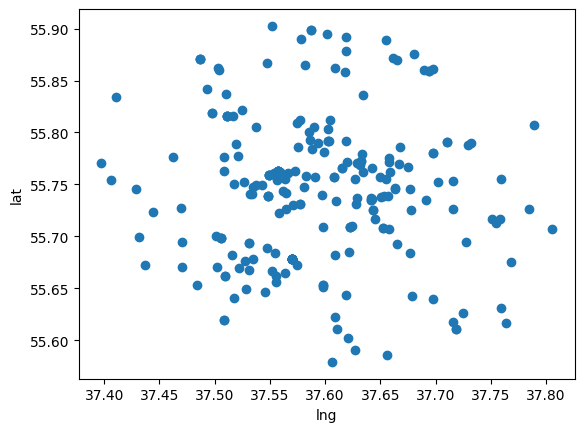

In [111]:
x = np.array(np.array(coords_inside_mkad_lng), dtype=float)
y = np.array(np.array(coords_inside_mkad_lat), dtype=float)
plt.scatter(x, y)
plt.xlabel('lng')
plt.ylabel('lat')
plt.show()

(1 балл) Нанесите все точки вакансий на карту (для этого вам поможет данная <a target="_blank" href="https://plotly.com/python/mapbox-layers/">документации</a>, не забудьте про прозрачность и центрирование по Москве): 

In [112]:
Kremlin = [55.752004, 37.617734]

fig = px.scatter_mapbox(lat=coords_inside_mkad_lat, lon=coords_inside_mkad_lng, center={"lat": Kremlin[0], "lon": Kremlin[1]}, opacity=0.7, zoom=9, height=300)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0, "t":0, "l":0, "b":0})
fig.show()    

![Картинка на случай, если не прогрузится верхняя](./MapVacancies.png)

(2 балла) **Сделайте выводы о проделанной работе:**

>*Подсказки для маленьких: Что вы можете сказать про районы Москвы? Что вы можете сказать про зарплаты? Что вы можете сказать про спрос?*

Тенденция такова, что плотность офисов компаний повышается, чем ближе к центру Москвы мы приближаемся. Ещё можно отметить, что в силу нахождения промышленных мощностей в Московской области, офисы компаний располагаются и совсем возле МКАДа, скорее всего, в виду упрощённой доступности выезда в область. Помимо всего, наблюдается "пробел" в области между ТТК и МКАД.

## Задание 2. Анализ данных - 20 баллов

Вам предстоит проанализировать датасет, содержащий информацию об бриллианта, их стоимости и остальных характеристиках.



Поясним значения хранящиеся в колонках:
*   `cut` - огранка бриллианта (относится к одной из примерно 10 наиболее распространенных)
*   `color` - цвет бриллианта, прозрачные бриллианты имеют градацию `D-Z`, "более высокие" буквы - более желтоватые, но часто имеют лучшие значения, поскольку цвет трудно определить один раз в кольце
*   `clarity` - чистота бриллианта, наличие включений (внутренних дефектов), чем меньше и мельче, тем лучше
*   `carat_weight` - масса бриллианта (слабо связана с размером бриллианта, т.к. огранка и качество огранки, как правило, играют большую роль)
*   `cut_quality` - качество ограники по системе оценки GIA Cut
*   `lab` - лаборатория оценивания
*   `meas_length` - длина бриллианта
*   `meas_width` - ширина бриллианта
*   `meas_depth` - глубина бриллианта
*   `total_sales_price` - цена бриллианта в долларах.
*    **и прочие колонки**

Скачаем данные:

In [151]:
!gdown 1uIWeZFz3ElB5p1brBVEwJBHTbjXNPdfU

Downloading...
From: https://drive.google.com/uc?id=1uIWeZFz3ElB5p1brBVEwJBHTbjXNPdfU
To: /content/diamonds.csv
100% 35.4M/35.4M [00:00<00:00, 210MB/s]


Создадим DataFrame:

In [152]:
diamonds = pd.read_csv("diamonds.csv")

(0.5 балла) Выведете первые 5 строк датасета:

In [153]:
diamonds.head(5)

,Unnamed: 0,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,...,meas_depth,girdle_min,girdle_max,fluor_color,fluor_intensity,fancy_color_dominant_color,fancy_color_secondary_color,fancy_color_overtone,fancy_color_intensity,total_sales_price
0,0,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.79,M,M,unknown,None,unknown,unknown,unknown,unknown,200
1,1,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,...,1.78,STK,STK,unknown,None,unknown,unknown,unknown,unknown,200
2,2,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.77,TN,M,unknown,None,unknown,unknown,unknown,unknown,200
3,3,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.78,M,STK,unknown,None,unknown,unknown,unknown,unknown,200
4,4,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Excellent,unknown,...,1.82,STK,STK,unknown,None,unknown,unknown,unknown,unknown,200


(0.5 балла) Найдите количество бриллиантов всего в данном датасете:

In [154]:
diamonds.shape[0]

219703

(0.5 балла) Выведите максимальную и минимальную цену бриллианта в формате `номер - цена`:

In [155]:
min_row = diamonds['total_sales_price'].idxmin()
min_cnt = diamonds.loc[min_row, 'Unnamed: 0']
min_price = diamonds.loc[min_row, 'total_sales_price']
print(f'{min_cnt} - {min_price}')

max_row = diamonds['total_sales_price'].idxmax()
max_num = diamonds.loc[max_row, 'Unnamed: 0']
max_price = diamonds.loc[max_row, 'total_sales_price']
print(f'{max_num} - {max_price}')

0 - 200
219703 - 1449881


(1 балл) Посчитайте количество пропусков (пропуском считается значение `unknown` или `None`):

In [156]:
diamonds.isin(["None", "unknown"]).sum().sum()

1891168

(1 балл) Найдите в каких столбцах присутствуют пропуски:

In [157]:
for col in diamonds.columns:
    if diamonds[col].astype(str).str.contains("None|unknown").any():
        print(col)

color
cut_quality
eye_clean
culet_size
culet_condition
girdle_min
girdle_max
fluor_color
fluor_intensity
fancy_color_dominant_color
fancy_color_secondary_color
fancy_color_overtone
fancy_color_intensity


В нашем датасете присутствуют колонки, которые начинаются с `fancy_color_` или `fluor_`. Большинство значений в этих колонках - `unknown` или `None`, поэтому мы считаем их малоинформативными. 

Ваша задача:

1. (0.5 балла) найти количество таких колонок, которые начинаются с `fancy_color_` или `fluor_`:

In [158]:
selected_cols = diamonds.filter(regex='^(fancy_color_|fluor_)')
len(selected_cols.columns)

6

2. (0.5 балла) найти количество информативных (не `None` или `unknown`) значений в этих колонках: 

In [159]:
columns_no_Nones = selected_cols[~selected_cols.isin(["None", "unknown"])]
num_cells_no_Nones = columns_no_Nones.isnull().sum().sum()
num_cells_no_Nones

1206632

3. (0.5 балла) удалить данные колонки из датасета, сохранив изменения (в дальнейшем работаем измененным датасетом):

In [160]:
diamonds.drop(selected_cols.columns, axis=1, inplace=True)

(1 балл) Проделайте тоже самое для колонок, начинающихся с `culet_`:

In [161]:
columns_culets = diamonds.filter(regex='^(culet_)')
print("Столбцов, начинающихся с culet_:", len(columns_culets.columns))
columns_culets_no_Nones = columns_culets[~columns_culets.isin(["None", "unknown"])]
num_cells_culet_no_Nones = columns_culets_no_Nones.isnull().sum().sum()
print("Общее число нформативных значений:", num_cells_culet_no_Nones)
diamonds.drop(columns_culets.columns, axis=1, inplace=True)

Столбцов, начинающихся с culet_: 2
Общее число нформативных значений: 290124


(1 балл) Посчитайте сколько бы стоил (в тысячах долларов) сейф, в котором хранились бы все бриллианты из датасета:

In [162]:
print(f"${diamonds.total_sales_price.sum() / 1000}K")

$1517721.991K


Немного необоснованных манипуляций.

(1 балл) Выберите из датасета строки с четными индексами и выведете значения (не меняя нумерацию индексов):

In [163]:
result = diamonds[diamonds.index % 2 == 0].reset_index().drop('index', axis=1)
result

,Unnamed: 0,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,depth_percent,table_percent,meas_length,meas_width,meas_depth,girdle_min,girdle_max,total_sales_price
0,0,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,62.7,59.0,2.85,2.87,1.79,M,M,200
1,2,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,61.1,59.0,2.88,2.90,1.77,TN,M,200
2,4,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Excellent,unknown,64.9,58.5,2.79,2.83,1.82,STK,STK,200
3,6,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,64.0,57.0,2.85,2.88,1.84,STK,STK,200
4,8,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,63.5,59.5,2.89,2.92,1.85,STK,TK,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109847,219695,Round,D,IF,12.52,Excellent,HRD,Excellent,Excellent,unknown,62.1,58.0,14.84,14.91,9.24,unknown,unknown,1121792
109848,219697,Oval,H,VS2,18.88,unknown,GIA,Excellent,Excellent,unknown,57.1,55.0,21.34,15.23,8.69,TN,STK,1132347
109849,219699,Round,E,VS1,10.65,Excellent,GIA,Excellent,Excellent,unknown,61.3,58.0,14.06,14.18,8.66,M,STK,1210692
109850,219701,Round,E,VS1,18.07,Excellent,GIA,Excellent,Excellent,unknown,60.2,59.0,17.06,17.10,10.20,TN,M,1315496


(0.5 балла) А теперь с индексами, кратными 6:

In [164]:
result = diamonds[diamonds.index % 6 == 0].reset_index().drop('index', axis=1)
result

,Unnamed: 0,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,depth_percent,table_percent,meas_length,meas_width,meas_depth,girdle_min,girdle_max,total_sales_price
0,0,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,62.7,59.0,2.85,2.87,1.79,M,M,200
1,6,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,64.0,57.0,2.85,2.88,1.84,STK,STK,200
2,12,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,61.8,58.5,2.85,2.89,1.77,STK,TK,200
3,18,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,61.0,60.0,2.91,2.92,1.78,M,M,200
4,24,Round,L,I1,0.34,Excellent,IGI,Excellent,Excellent,unknown,0.0,0.0,0.00,0.00,0.00,unknown,unknown,204
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36613,219679,Round,G,VS1,10.23,Excellent,GIA,Excellent,Excellent,unknown,62.7,55.0,13.82,13.92,8.69,TN,M,859320
36614,219685,Radiant,unknown,I1,0.89,unknown,GIA,Good,Good,unknown,63.8,57.0,6.44,4.96,3.16,TK,VTK,982560
36615,219691,Round,D,VVS2,10.10,Excellent,GIA,Excellent,Excellent,unknown,59.4,59.0,14.07,14.15,8.39,M,STK,1040739
36616,219697,Oval,H,VS2,18.88,unknown,GIA,Excellent,Excellent,unknown,57.1,55.0,21.34,15.23,8.69,TN,STK,1132347


(1 балл) Выберете из датасета только категорильные признаки и выведете датасет:

In [165]:
diamonds_categorical = diamonds.select_dtypes(include=['object', 'category'])
diamonds_categorical

,cut,color,clarity,cut_quality,lab,symmetry,polish,eye_clean,girdle_min,girdle_max
0,Round,E,VVS2,Excellent,IGI,Very Good,Very Good,unknown,M,M
1,Round,E,VVS2,Very Good,IGI,Very Good,Very Good,unknown,STK,STK
2,Round,E,VVS2,Excellent,IGI,Very Good,Very Good,unknown,TN,M
3,Round,E,VVS2,Excellent,IGI,Very Good,Very Good,unknown,M,STK
4,Round,E,VVS2,Very Good,IGI,Very Good,Excellent,unknown,STK,STK
...,...,...,...,...,...,...,...,...,...,...
219698,Round,E,VS1,Excellent,GIA,Excellent,Excellent,unknown,M,STK
219699,Radiant,unknown,VS2,unknown,GIA,Very Good,Very Good,unknown,TK,XTK
219700,Round,E,VS1,Excellent,GIA,Excellent,Excellent,unknown,TN,M
219701,Princess,unknown,SI2,unknown,GIA,Good,Good,unknown,XTN,VTK


>**Примечание**
>
>Данный датасет можно использовать для задания 3 (с использованием `sklearn`)

(0.5 балла) Выберете столбец с данными о цене бриллиантов и домножите его на тот столбец, только транспонированный, и выведите полученную матрицу:

In [167]:
total_sales_price = diamonds['total_sales_price']
prices_matrix = np.array(total_sales_price).reshape(1, -1)

# Только 5 первых строк, так как операция - слишком огромная 
prices_matrix_5 = np.array(total_sales_price[:5]).reshape(1, -1)
print(prices_matrix_5)

mult_matrix = np.dot(prices_matrix_5.T, prices_matrix)
mult_matrix

[[200 200 200 200 200]]


array([[    40000,     40000,     40000, ..., 263099200, 270000000,
        289976200],
       [    40000,     40000,     40000, ..., 263099200, 270000000,
        289976200],
       [    40000,     40000,     40000, ..., 263099200, 270000000,
        289976200],
       [    40000,     40000,     40000, ..., 263099200, 270000000,
        289976200],
       [    40000,     40000,     40000, ..., 263099200, 270000000,
        289976200]])

### Построение графиков

**Требования к графику:**

1.   График должен быть подписан
2.   Оси должны быть подписаны
3.   Должна быть легенда графика
4.   График должен быть информативным (желательно без сильных выбросов)

**Все надписи на русском языке!**

>**Примечание**
>
>График необходимо строить для очищенных данных - в них не должно быть пропусков по осям, по которым строите график. При этом **не перезатирайте** имеющийся датафрейм!

(2 балла) Постройте график `цвет бриллианта - стоимость`:

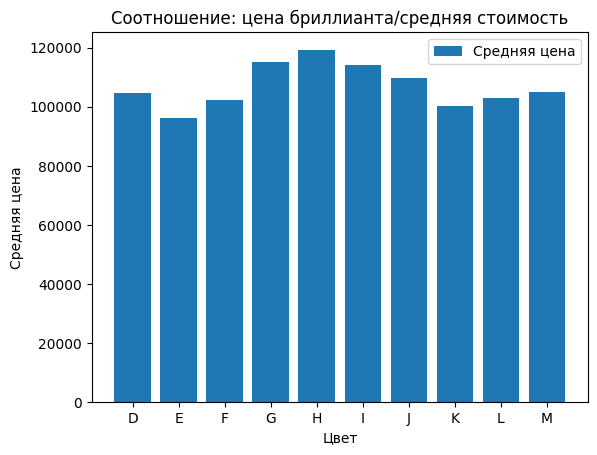

In [168]:
color_sales = diamonds.groupby('color')['total_sales_price']

X = []
Y = []
for color, prices in color_sales.groups.items():
  if color == "unknown":
    continue
  X.append(color)
  Y.append(sum(prices) / len(prices))

plt.bar(X, Y)
plt.title('Соотношение: цена бриллианта/средняя стоимость')
plt.xlabel('Цвет')
plt.ylabel('Средняя цена')
plt.legend(['Средняя цена'])

plt.show()

(2 балла) Постройте график `лабараторная оценка - кол-во бриллиантов`:

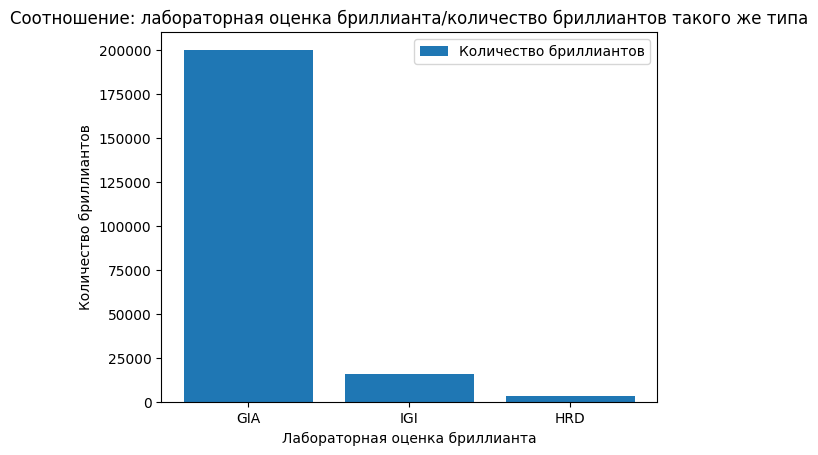

In [169]:
color_counts = diamonds['lab'].value_counts()

plt.bar(color_counts.index, color_counts.values)
plt.title('Соотношение: лабораторная оценка бриллианта/количество бриллиантов такого же типа')
plt.xlabel('Лабораторная оценка бриллианта')
plt.ylabel('Количество бриллиантов')
plt.legend(['Количество бриллиантов'])

plt.show()

(2 балла) Постройте график `вес бриллианта - стоимость`:

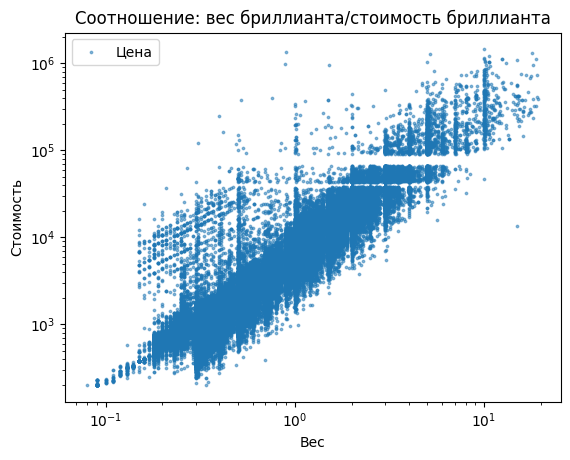

In [170]:
plt.scatter(x=diamonds['carat_weight'], y=diamonds['total_sales_price'], s=3, alpha=0.5)

plt.title("Соотношение: вес бриллианта/стоимость бриллианта")
plt.xlabel("Вес")
plt.ylabel("Стоимость")
plt.xscale('log')
plt.yscale('log')

plt.legend(['Цена'])

plt.show()

(2 балла) Постройте график `система оценки GIA Cut - кол-во бриллиантов`:

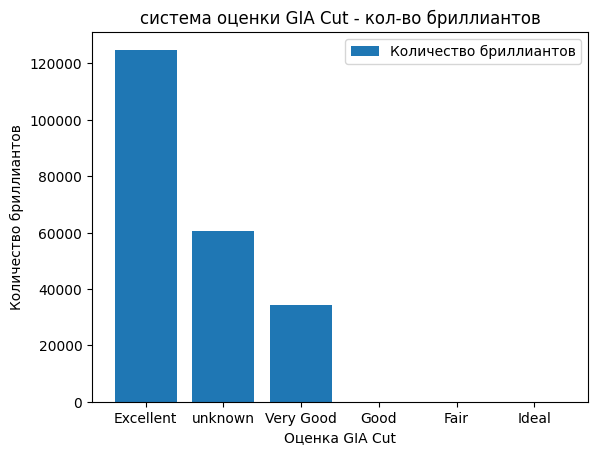

In [171]:
color_counts = diamonds['cut_quality'].value_counts()

plt.bar(color_counts.index, color_counts.values)
plt.title('система оценки GIA Cut - кол-во бриллиантов')
plt.xlabel('Оценка GIA Cut')
plt.ylabel('Количество бриллиантов')
plt.legend(['Количество бриллиантов'])

plt.show()

(2 балла) **Сделайте выводы по построенным графикам:**

>*Подсказка для маленьких: Что вы можете сказать о графиках полученных выше для данного датасета?*

По графику "цвет бриллианта - стоимость" можно утверждать, что явной корреляции между цветом бриллианта и его ценой - нет. 

Столбчатая диаграмма "лабораторная оценка - кол-во бриллиантов" показывает, что бОльшая часть бриллиантов имеет оценку "GIA", затем следует "IGI", а самой малочисленной оценкой является "HRD".

По графику "вес бриллианта - стоимость" можно увидеть небольшую корреляцию веса бриллианта и стоимости. Однако большой разброс у бриллиантов одинакового веса сигнализирует о том, что обработка бриллианта играет бОльшую роль, чем его размер.

Последняя диаграмма "система оценки GIA Cut - кол-во бриллиантов" показывает, что бОльшая часть имеет оценку "отлично" и "хорошо". Кроме того, много мусора/шума в виде "unknown" огранки.

## Задание 3. Модель - 30 баллов

В данном задании вам предстоит построить классифицирующую модель размер алмаза и его стоимости, а затем оценить полученную модель.

>**Примечание**
>
>Данная модель не претендует на самый верный индикатор стоимости алмаза, ведь мы не учитываем ничего больше чем стоимость алмаза. Исключительно для образовательных целей :)

Для построения модели нам понадобится 4 столбца, а именно: 
- `meas_length`
- `meas_width`
- `meas_depth`
- `total_sales_price`

От остальных столбцов можно избавиться.

(1 балл) Создайте новый датасет и выведите его первые 10 строк: 

In [172]:
diamonds = pd.read_csv("diamonds.csv")
keep_cols = ['meas_length', 'meas_width', 'meas_depth', 'total_sales_price']
diamonds = diamonds[keep_cols]
diamonds.head()

,meas_length,meas_width,meas_depth,total_sales_price
0,2.85,2.87,1.79,200
1,2.84,2.89,1.78,200
2,2.88,2.90,1.77,200
3,2.86,2.88,1.78,200
4,2.79,2.83,1.82,200


(1 балл) Перемешайте строки в датафрейме случайным образом: 

In [173]:
diamonds = diamonds.sample(frac=1, random_state=123)

(1 балл) Сформируем новую колонку - для каждого бриллианта найдем сумму Минковского (p=3) по 3 измерениям бриллианта:

In [174]:
minkowski_addition = np.power(np.power(diamonds['meas_length'], 3) 
                              + np.power(diamonds['meas_width'], 3) 
                              + np.power(diamonds['meas_depth'], 3), 1/3)

diamonds['minkowski_addition'] = minkowski_addition

diamonds.head()

,meas_length,meas_width,meas_depth,total_sales_price,minkowski_addition
208332,7.62,7.66,4.75,20619,9.996925
46392,4.31,4.33,2.71,900,5.658197
62718,4.35,4.35,2.61,1018,5.671255
67681,4.09,4.11,2.53,1048,5.360558
26075,4.25,4.29,2.68,764,5.593104


(1 балл) Сформируем новый датасет из двух колонок - сумма Минковского и `total_sales_price`: 

In [175]:
new_diamonds = diamonds[['minkowski_addition', 'total_sales_price']]

(1 балл) Разделите вашу выборку на две части в соотношении 8:2 - одна выборка будет для тренировка, а другая для тестов вашей модели:

In [176]:
train_data, test_data = train_test_split(new_diamonds, test_size=0.2, random_state=123)

(2 балла) Постройте график зависимости стоимости от вашего нового параметра размера для тренинг-выборки:

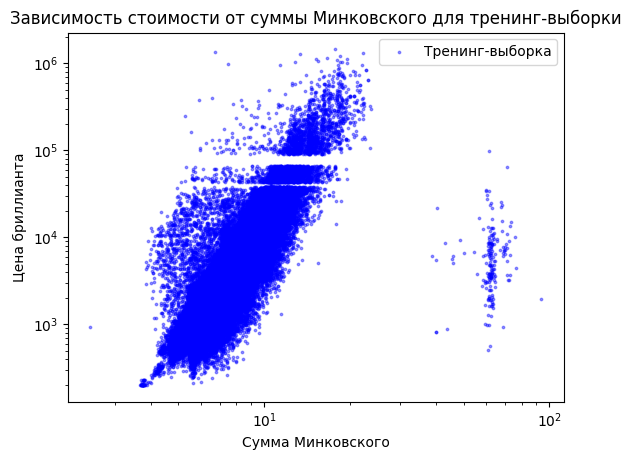

In [177]:
plt.scatter(
    x=train_data['minkowski_addition'],
    y=train_data['total_sales_price'],
    s=3,
    alpha=0.4, 
    color="blue"
)
plt.title('Зависимость стоимости от суммы Минковского для тренинг-выборки')
plt.xlabel('Сумма Минковского')
plt.ylabel('Цена бриллианта')
plt.legend(['Тренинг-выборка'])

plt.xscale('log')
plt.yscale('log')
plt.show()

(2 балла) Нанесите на тот же график тестовую выборку, используя другой цвет (не забудьте про параметр прозрачности):

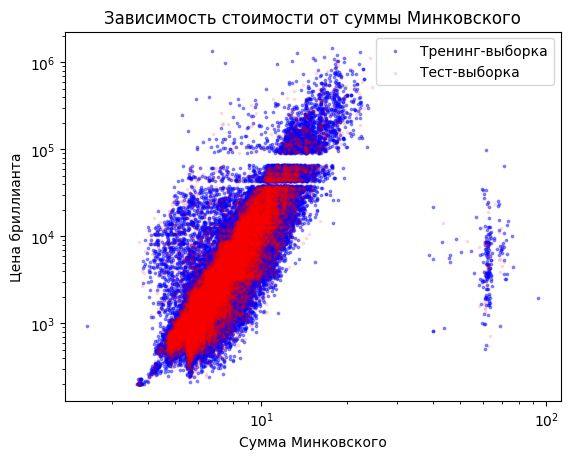

In [178]:
plt.scatter(
    x=train_data['minkowski_addition'],
    y=train_data['total_sales_price'],
    s=3,
    alpha=0.4,
    color="blue"
)
plt.scatter(
    x=test_data['minkowski_addition'],
    y=test_data['total_sales_price'],
    s=3,
    alpha=0.1,
    color="red"
)
plt.title('Зависимость стоимости от суммы Минковского')
plt.xlabel('Сумма Минковского')
plt.ylabel('Цена бриллианта')
plt.legend(['Тренинг-выборка', 'Тест-выборка'])
plt.xscale('log')
plt.yscale('log')

plt.show()

(3 балла) Найдите для каждой бриллианта из тестовой выборки его "ближайшего соседа" из тренинг-выборки. Для каждого бриллианта из тестовой выборки найдите расстояния до соответствующего ближайшего соседа:

In [179]:
from sklearn.neighbors import NearestNeighbors

neighbors = NearestNeighbors(n_neighbors=1, algorithm='auto').fit(train_data)
distances, indices = neighbors.kneighbors(test_data)

prediction = train_data.iloc[indices.ravel()]

prediction.head()


,minkowski_addition,total_sales_price
205062,8.624214,19026
128124,6.728012,2736
163749,7.757658,5060
184648,8.517558,8715
127302,6.644467,2790





(3 балла) Найдите насколько сильно (в процентах) отличается цена бриллиантов из тестовой выборки от их соответствующих ближайших соседей:

In [180]:
difference = test_data - prediction.values
diff_percent = difference["total_sales_price"].abs() / test_data["total_sales_price"] * 100
diff_percent.head()


205059    0.0
128097    0.0
163754    0.0
184649    0.0
127258    0.0
Name: total_sales_price, dtype: float64

In [181]:
diff_percent.max()

3.6370110161138345

**Данная модель является выдумкой автора. Не важен коэффициент ошибки, важны ваши шаги для получения коэффициента.**

### Введение в машинное обучение

Теперь давайте познакомимся с таким сильным инструментом как `sklearn`.

Вам необходимо:
1. выбрать 2 категориальных признака
2. на их основе обучить решающее дерево
3. оценить среднеквадратичную ошибку цены бриллианта
4. сделать пп. 1-3 и выбрать ту пару, которая дает лучший результат
5. сделать выводы

(3 балла) Мы работаем с категориальными признаками, для них не понятно что есть "больше" и "меньше". Поэтому нам нужно предварительно закодировать значения наших признаков, с чем нам поможет [OneHotEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html):

In [182]:
x = pd.get_dummies(diamonds_categorical)
x.head()

,cut_Asscher,cut_Cushion,cut_Cushion Modified,cut_Emerald,cut_Heart,cut_Marquise,cut_Oval,cut_Pear,cut_Princess,cut_Radiant,...,girdle_max_M,girdle_max_STK,girdle_max_STN,girdle_max_TK,girdle_max_TN,girdle_max_VTK,girdle_max_VTN,girdle_max_XTK,girdle_max_XTN,girdle_max_unknown
0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [183]:
y = diamonds["total_sales_price"]

(3 балла) Разбейте датасет на обучающую и тестовую выбору. Для этого вам поможет [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html):

In [184]:
x_train, x_test, y_train, y_test = train_test_split(x.values, y.values, train_size=0.75, random_state=123)

(3 балла) Затем создайте и обучите вашу модель - [DecisionTreeRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html):

In [185]:
from sklearn.tree import DecisionTreeRegressor

my_decisive_tree = DecisionTreeRegressor()
my_decisive_tree.fit(x_train, y_train)
y_pred = my_decisive_tree.predict(x_test)

(3 балла) Оцените ошибку вашей модели при помощи [mean_squared_error](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html):

In [186]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, y_pred)

812903778.2460831

In [187]:
min = float("inf")
comb = [None, None]

for par1 in diamonds_categorical:
    for par2 in diamonds_categorical:
        if (par1 == par2):
            continue
        d_columns = x.columns[x.columns.str.startswith((par1, par2))]
        x_train, x_test, y_train, y_test = train_test_split(x[d_columns].values, y.values, train_size=0.8, random_state=123)

        my_decisive_tree = DecisionTreeRegressor()
        my_decisive_tree.fit(x_train, y_train)
        y_pred = my_decisive_tree.predict(x_test)

        cur = mean_squared_error(y_test, y_pred)
        if min > cur:
            min = cur
            comb = [par1, par2]

print(comb, ": ", min)

['symmetry', 'polish'] :  601308888.1989586


(3 балла) **Сделайте выводы какие категориальные признаки лучше:**

*Подсказки для маленьких: Что вы можете сказать о зависимости по вашей выборке признаков? Какой вы можете сделать вывод об готовых инструментах для работы и написанных Вами?*

В данном случае, symmetry и polish лучше всех остальных пар демонстрируют корреляцию с ценой бриллианта, однако, большая mean_squared_error (порядка 1e8) указывает на то, что модель не самая точная. 

Готовыми инструментами очень удобно пользоваться + они работают явно быстрее, чем написанные "руками".